In [1]:
from scipy import stats
import matplotlib.pyplot as plt

# import to read png as matrix

import numpy as np


Leemos la imágen y la mostramos

```python

(512, 768, 3)


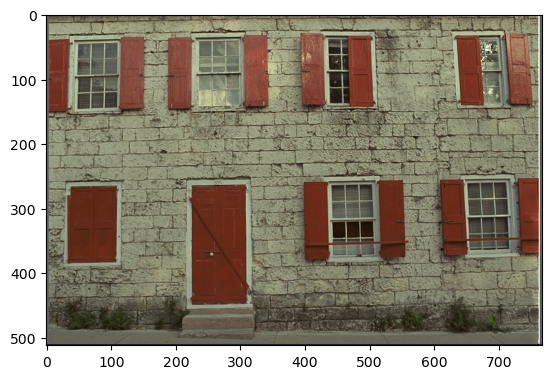

In [2]:
# read image with nunpy

img_path = './img/1.png'
img = plt.imread(img_path)

print(img.shape)
# plot image
plt.imshow(img)

Pasamos la imágen a escala de grises

```python

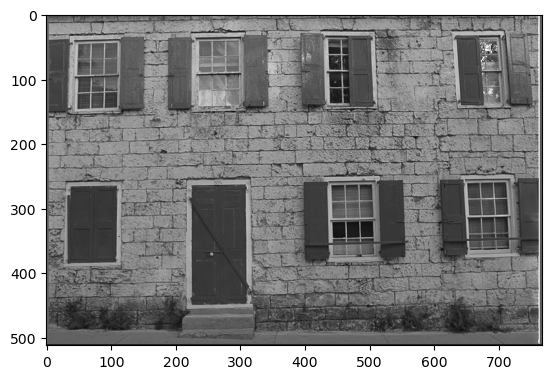

In [3]:
bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

plt.imshow(bw_img, cmap='gray')

# Box-Cox Full image    

Ahora normalizamos la imagen, aplicamos box filter y mostramos el resultado.


```python

lambda: 0.9001643956745008


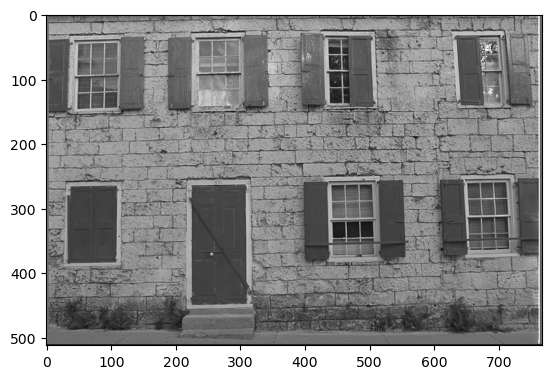

In [4]:
bc_img = bw_img.flatten()

# normaliza
bc_img = (bc_img - bc_img.min())/(bc_img.max() - bc_img.min()) + 0.0001

bc_img = stats.boxcox(bc_img)

print(f'lambda: {bc_img[1]}')

plt.hist(bc_img[0], bins=100)

bc_img = bc_img[0].reshape((512, 768))

bc_img = (bc_img - bc_img.min())/(bc_img.max() - bc_img.min())


plt.imshow(bc_img, cmap='gray')

Distintos rangos de $\lambda$

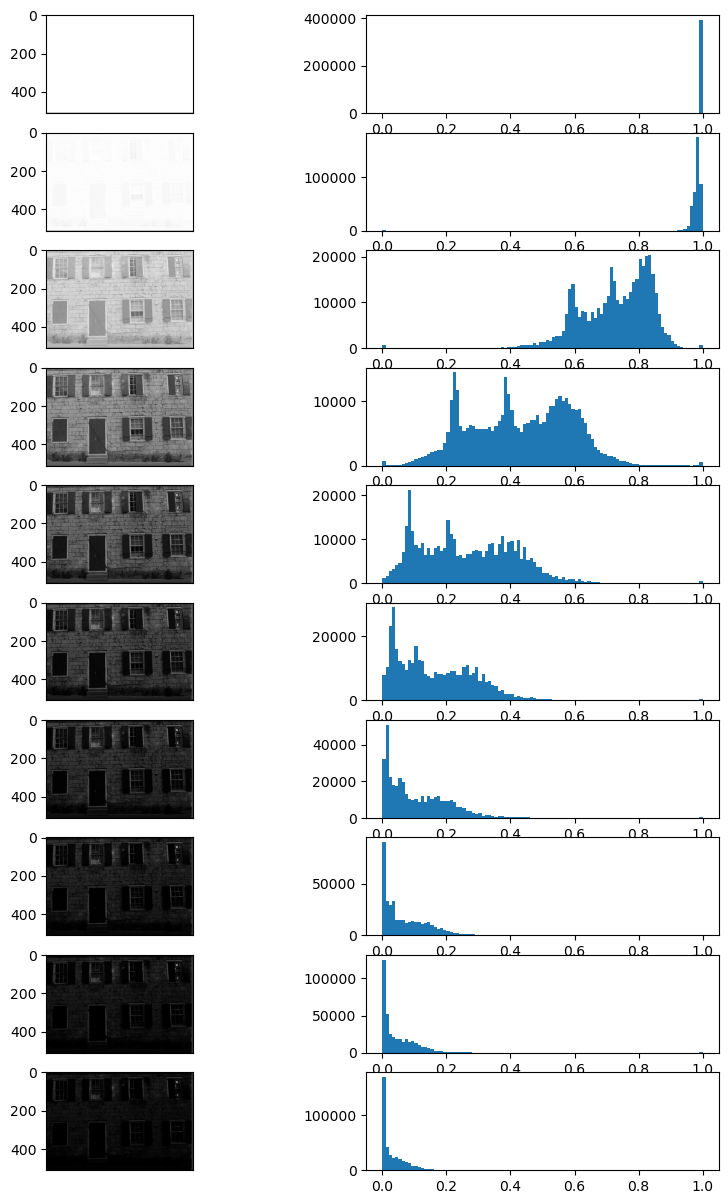

In [5]:
for i in range (1, 24):

    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)
    bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    fig, ax = plt.subplots(10, 2, figsize=(10, 15))

    for j, lmmbda in enumerate(np.linspace(-1, 5, 10)):

        bc_img = bw_img.flatten()

        # normaliza
        bc_img = (bc_img - bc_img.min())/(bc_img.max() - bc_img.min()) + 0.0001

        bc_img = stats.boxcox(bc_img, lmmbda)

        # print(f'lambda: {lmmbda}')

        # plt.hist(bc_img, bins=100)

        

        bc_img = (bc_img - bc_img.min())/(bc_img.max() - bc_img.min())

        # plot imshow and hitogram
        

        
        ax[j,1].hist(bc_img, bins=100)
        bc_img = bc_img.reshape((512, 768))
        ax[j,0].imshow(bc_img, cmap='gray')
        
        #delete axis label on img an remove y axis labels on hist 
        ax[j,0].set_xticks([])
        
        

    plt.show()
    break

Calculando MIC con histograma de la imagen

```python

(array([[  1.,   0., 511., ...,   0.,   0.,   0.],
        [  1.,   0., 511., ...,   0.,   0.,   0.],
        [  1.,   0., 511., ...,   0.,   0.,   0.],
        ...,
        [508.,   1.,   3., ...,   0.,   0.,   0.],
        [  1.,   0., 511., ...,   0.,   0.,   0.],
        [  1.,   0., 511., ...,   0.,   0.,   0.]]),
 array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
        0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
        0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
        0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
        0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
        0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
        0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,

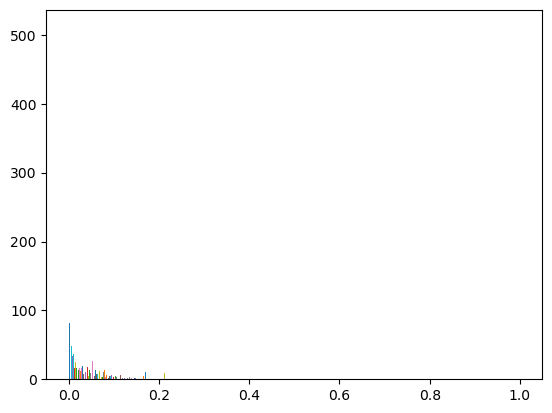

In [6]:
img_hist = np.histogram(bc_img, bins=256)
# plot histogram
plt.hist(bc_img, bins=256)

lambda: 0.2514728604004783


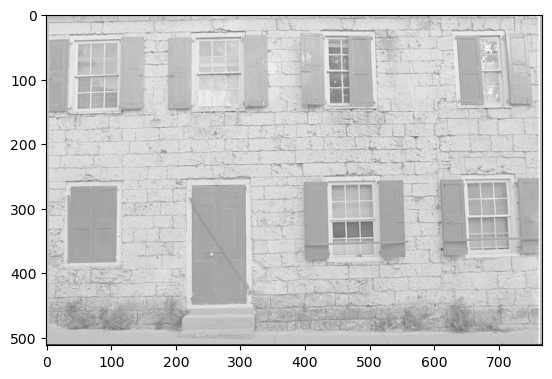

In [10]:
bc_img = bw_img.flatten()

# normaliza
bc_img = (bc_img - bc_img.min())/(bc_img.max() - bc_img.min()) + 0.0001

# calculate  histogram

img_hist = np.histogram(bc_img, bins=256)

bc_hist = stats.boxcox(img_hist[0]+1)

print(f'lambda: {bc_hist[1]}')

bc_img_hist = stats.boxcox(bc_img, lmbda=bc_hist[1])

bc_img_hist = bc_img_hist.reshape((512, 768))

bc_img_hist = (bc_img_hist - bc_img_hist.min())/(bc_img_hist.max() - bc_img_hist.min())


plt.imshow(bc_img_hist, cmap='gray')

Ventana movil para calcular $\lambda$